# K-Nearest Neighours (KNN) Algorithm

In [2]:
from IPython.display import Image

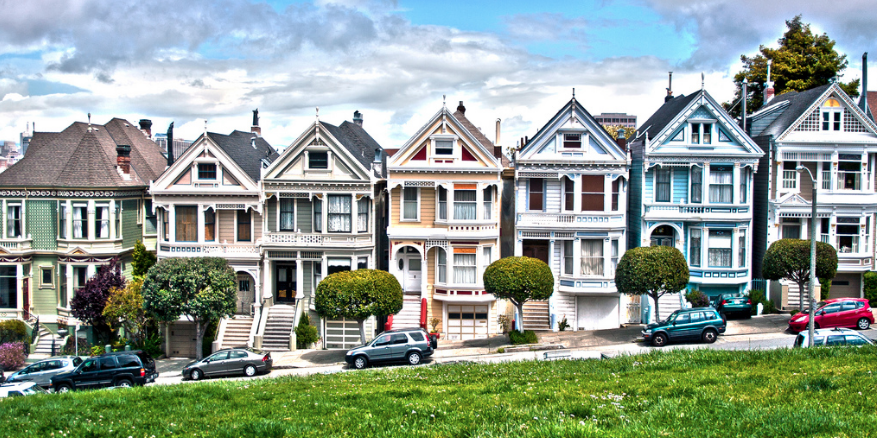

In [3]:
Image(
    filename="images/image_0.jpg",
    width=500,
    height=300,
)

**K-Nearest Neighbours (KNN)** is an algorithm that belongs to the group of supervised algorithms and can be used to solve classification and regression problems. In the case of classification, the label of unseen data is assigned by observing the neighbours that surround that data (the closest K labelled points) and take the label of majority vote (the most prevalent label is assigned to the unseen data). In the case of regression, the average of the values of K nearest neighours is assigned to the unseen data. This algorithm is used in variety of applications such as healthcare, finance, political science, etc. For example, in finance it can be applied to predict the credit rating of customers or in the case of political science, whether a person will vote or not for some political party.


**K-Nearest Neighbours (KNN)** is called a *non-parametric* model because there are no parameters to train. Sometimes it is called *lazy learner* because it doesn’t learn a discriminative function from the training data but “memorizes” the training dataset instead. Note that a lazy learner does not have a training phase and the prediction step in **KNN** is relatively expensive. Each time the prediction needs to be made the algorihtm searches for the nearest neighbour(s) in the entire training set. 

In order to classify the new point, **KNN** needs the following: training data, predefined number of neighbours (*K*) and a distance metric. For example, imagine that you have training points and you have a point (marked as a black cross on the Figure below) for which you want to define a class label.

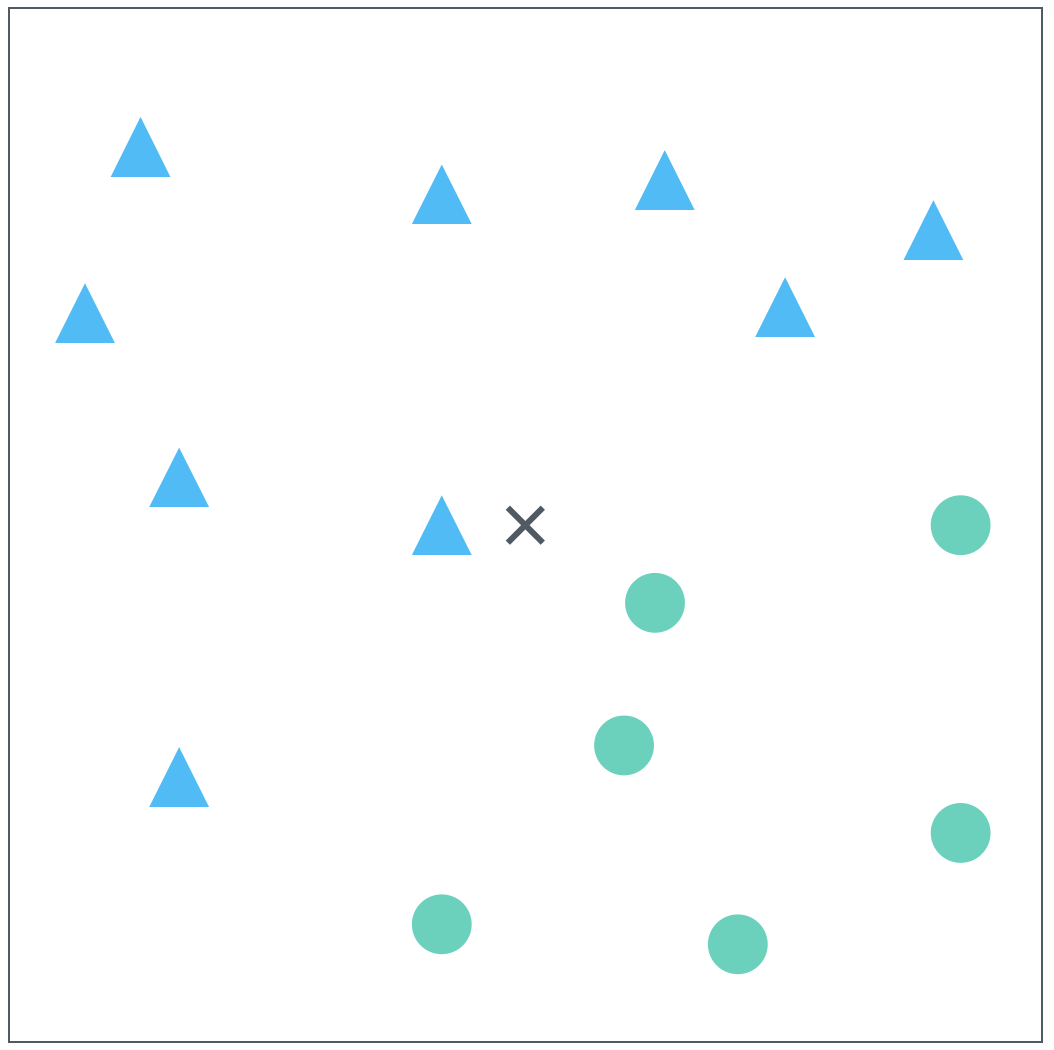

In [4]:
Image(
    filename="images/image_1.png",
    width=250,
    height=250,
)

## A Theoretical Approach: How does KNN work?
------

The parameters that first need to be defined are: K - number of neighbours and D - distance metric. Let's assume that the training data can be represented as $\left \{ x_{i}, y_{i} \right \}$, where $x_{i}$ is a set of attributes that describes the training data point, $y_{i}$ is its class label, and $i=\left \{ 1,...,I \right \}$ where $I$ is the total number of training data points. The unlabelled data point is represented as $x$ and the following steps need to be taken to assign it a label:

* Calculate its distance $D(x,x_{i})$ to all training data points according to some pre-agreed distance metric.
   
   
* Seelect K training data points (closest neighbours) and their class labels which have the shortest distance from the unlabelled point $\left \{ x, y \right \}$.
   
   
* To determine the class of this unlabelled point $y$, take the most frequent class in K neighbourhood (a majority vote).

The following Figure shows how the unlabelled data point (marked as black cross) has been classified in case the number of neighbours K is 1, 2 and 3. It can be seen that when K equals 3, the label of majority vote (marked as green circles) has been assigned to be the label of the data of intereset (black cross). 

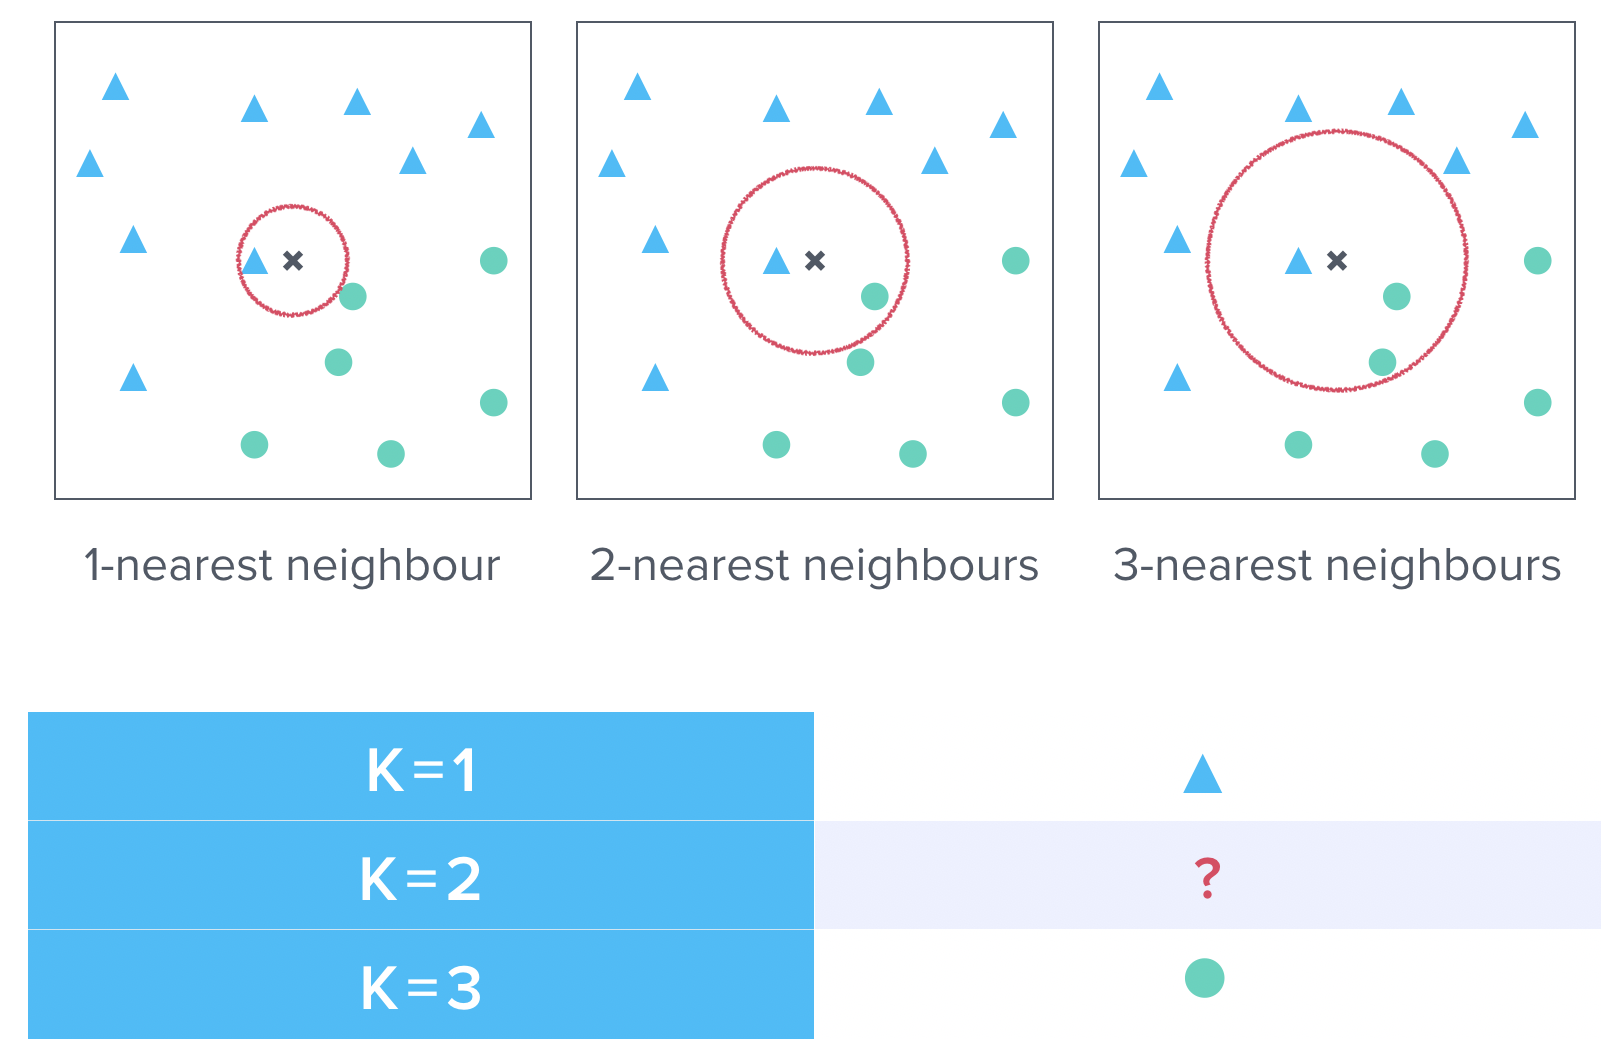

In [5]:
Image(
    filename="images/image_2.png",
    width=500,
    height=600,
)

There are various distance metrics that can be used when applying **KNN** algorihtm. The common choice for numeric data is the Euclidean distance, while in case of categorical data the Hamming distance is used, but there are other distances that can be used as well. Here are some of the available distance metrics:

* Euclidean distance: $\sqrt{\sum_{i=1}^{n}(a_{i} - b_{i})^{2}}$ 


* Manhattan distance: $\sum_{i=1}^{n}\left |a_{i} - b_{i} \right |$ 


* Chebyshev distance: $\underset{i}{max}(a_{i}-b_{i})$


* Minkowski distance $\left [\sum_{i=1}^{n}(a_{i}-b_{i})^{p}  \right ]^{p}$


* Hamming distance $\sum_{i=1}^{n}1_{a_{i}\neq b_{i}}$

After selecting the distance metrics the second parameter that needs to be defiend is the number of neighbours K. It is well known that choosing low values of K makes algorithm more sensitive (complex model) to outliers (the noise in our data) which can cause overfitting, while selecting higher K values makes algorithm more resilient to outliers (more voters participate in prediction) and can lead to underfitting. So, how to know which distance and K to use? Perform **cross-validation** which is explained in the upcoming example.


**Cross-validation** is a smart way to find out the optimal K value. It estimates the validation error rate by holding out a subset of the training set from the model building process. Cross-validation (let's say 10 fold validation) involves randomly dividing the training set into 10 groups, or folds, of approximately equal size. 90% data is used to train the model and remaining 10% is used to validate it. The misclassification rate is then computed on the 10% validation data. This procedure is repeated 10 times. Different group of observations are treated as a validation set each of the 10 times. It results in 10 estimates of the validation error which are then averaged out.


K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbour algorithm. 


The number of neighbours in KNN is a hyperparameter that you need to choose at the time of model building. Research has shown that there is no optimal number of neighbours that is suitable for all kinds of data sets, as each dataset has it's own requirements. In the case of a small number of neighbours, the noise will have a higher influence on the result, while a large number of neighbours make it computationally expensive. 


### KNN Pros and Cons
-----

**KNN Pros**:

* Easy to understand (use geometric arguments, no equations).


* No assumptions about data (when there is little or no prior knowledge about the distribution data, non-parametric KNN can be useful in case of nonlinear data).


* Used to solve both classification and regression problems. It can be used to solve multi-class problems as well.


* Sometimes competitive with state of the art classifiers.



**KNN Cons**:


* Performance highly dependent on K and distance metrics. Computattionally expensive: memory - high memory requirement to store all the training data, and time - needs to compute the distance to all training data.


* Inefficient if needed to classify large data sets (prediction stage might be slow).


* Accuracy degraded by noisy/irrelevant attributes. Sensitive to irrelevant features and the scale of the data (not suitable for large dimensional data).


**Some considerations:**


Consider using PCA to reduce dimensions - KNN performs better with a lower number of features than a large number of features. In order to cope with the problem of highly dimenisonal data, Principal Component Analysis (PCA) or feature selection can be applied. Also, another important requirement is a feature scaling (data normalisation) - it might happen that units of measure differ between features, which contributes that those features dominate in their contribution to the distance measure, thus unabling estimator to learn from other features correctly as expected. An example would be, a feature that represents a hight of the person (*cms*), and a feature that refers to the weight of the person (*kgs). The height will have greater influence on distance calculation than the weight of a person. Some of the methods used to standardise the data are: 

* **Min-Max Normalisation**: $x^{'}= \frac{x-min(x)}{max(x)-min(x)}$,


* **Mean Normalisation**: $x^{'}= \frac{x-average(x)}{max(x)-min(x)}$, 

where $x$ and $x^{'}$ are the original and normalised values, respectively.

# A Pratical Approach: Case Study
-----

In this section we are going to see the practical approach of using KNN algorithm to solve classification problem, that is to **predict whether a patient has a diabetes or not**. Firstly,  we apply data cleaning, for example coping with missing data, feature scaling, and we familiarise with the features in diabetes dataset, for example plotting distributions of the features. This is described in **Data Preparation** section. The second section, called **Hyper-parameter Tuning** shows some ways how to select the values for number of neighbours K, such as for example using cross-validation. Finally, the third section, **Train and Test KNN** is reserved for training and testing KNN classifier. Training dataset is used to generate predictions, while the test dataset is used to evaluate the performance of KNN classifier.

**Goal**: Predict whether the patient has diabetes based on diagnostic measures.

**Dataset**: The dataset is composed of *medical predictor variables* (features) and one *target variable* (class label). The data is collected for female patients of Pima Indian hertiage that are at least 21 years old, and originally it is from the National Institute of Diabetes and Digestive and Kidney Diseases. Here is the brief description of *medical predictor variable* and *target variable*:

* **Pregnancies**: Number of pregnancies the patient has had

* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

* **BloodPressure**: Diastolic blood pressure (mm Hg)

* **SkinThickness**: Triceps skin fold thickness (mm)

* **Insulin**: 2-Hour serum insulin (mu U/ml)

* **BMI**: Body mass index (weight in kg/(height in m)^2)

* **DiabetesPedigreeFunction**: Diabetes pedigree function

* **Age**: Age (years)

* **Outcome**: Class variable (0 or 1)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Load the dataset.
df = pd.read_csv("https://s3-eu-west-1.amazonaws.com/faculty-client-teaching-materials/non-linear-algorithms/diabetes_data.csv")

In [8]:
# Check the shape of dataframe.
print("dimension of diabetes data: {}".format(df.shape))

dimension of diabetes data: (768, 9)


In [9]:
# The first 8 columns represent the features and the last column
# represent the target label.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Data Preparation

In [10]:
# Check missing values.
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
# Change the column name ‘Outcome’ to ‘diabetes’ and set 1 to be 'Yes',
# and 0  to be 'No'.
df = df.rename({"Outcome": "Diabetes"}, axis=1)
df["Diabetes"] = df["Diabetes"].replace(1, "Yes")
df["Diabetes"] = df["Diabetes"].replace(0, "No")

Text(0, 0.5, 'Number of outcomes')

<Figure size 432x288 with 0 Axes>

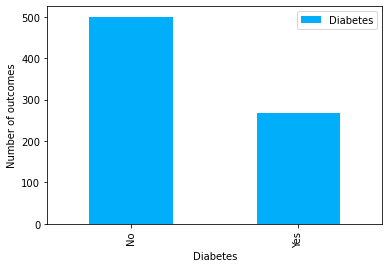

In [37]:
# Check distribution of target variable.
diabetes = pd.DataFrame(df["Diabetes"].value_counts())

plt.figure()
diabetes.plot(color="#FA7268", kind="bar")
plt.xlabel("Diabetes")
plt.ylabel("Number of outcomes")

As it can be seen, the classes are fairly divided, which means there is no problem of unbalanced classes in our case.

In [13]:
# Fill in missing values.
df["Glucose"].fillna(df["Glucose"].mean(), inplace=True)
df["BloodPressure"].fillna(df["BloodPressure"].median(), inplace=True)
df["SkinThickness"].fillna(df["SkinThickness"].median(), inplace=True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace=True)
df["BMI"].fillna(df["BMI"].median(), inplace=True)

In [14]:
# Check statistics.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.386719,29.108073,155.548223,32.455208,0.471876,33.240885
std,3.369578,30.435949,12.096642,8.791221,85.021108,6.875177,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,155.548223,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


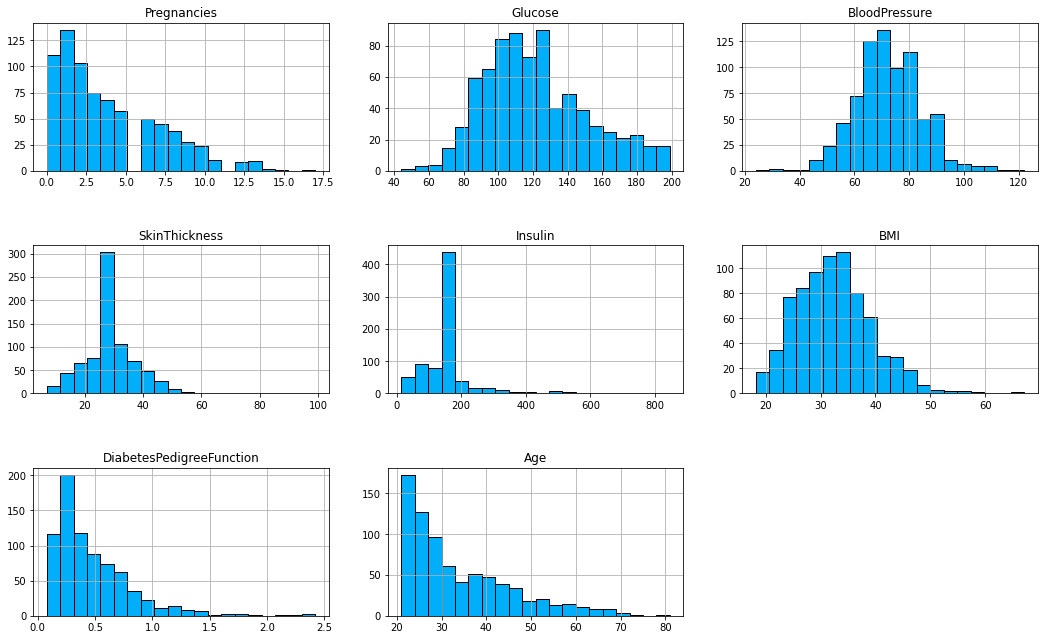

In [16]:
columns = df.columns[:8]
plt.subplots(figsize=(18, 15))
length = len(columns)

# Plot distribution of each feature.
for i, j in zip(columns, range(length)):

    plt.subplot((length / 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df[i].hist(color="#FA7268", bins=20, edgecolor="black")
    plt.title(i)
plt.show()

In [17]:
import lens

In [18]:
# Generate lens summary.
ls = lens.summarise(df, scheduler="sync")

In [19]:
# Convert a lens summary into an explorer object.
explorer = lens.explore(ls)
explorer.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
desc,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,categorical
dtype,int64,float64,float64,float64,float64,float64,float64,int64,object
notnulls,768,768,768,768,768,768,768,768,768
nulls,0,0,0,0,0,0,0,0,0
unique,17,136,46,50,186,247,517,52,2


In [174]:
# An example of feature statistic.
explorer.column_details("DiabetesPedigreeFunction")

,DiabetesPedigreeFunction
desc,numeric
dtype,float64
min,0.078
max,2.42
mean,0.4718763020833327
median,0.3725
std,0.33132859501277484
sum,362.40099999999995
IQR,0.38249999999999995


In [175]:
# Check correlation between each variables.
explorer.correlation()

,DiabetesPedigreeFunction,BloodPressure,Pregnancies,Age,SkinThickness,BMI,Glucose,Insulin
DiabetesPedigreeFunction,1.0,0.009744042197317827,-0.04324150124936041,0.042908587709087904,0.059044205643216385,0.13432783730982803,0.09025795216295111,0.0480416859380132
BloodPressure,0.009744042197317827,1.0,0.18958571315109665,0.3662213758248245,0.20354479205890633,0.2897536170828572,0.24226980417846397,0.10618667980268072
Pregnancies,-0.04324150124936041,0.18958571315109665,1.0,0.6072163388236559,0.09144076520180122,0.0006078285166275953,0.1287439294629673,0.10287801545450155
Age,0.042908587709087904,0.3662213758248245,0.6072163388236559,1.0,0.18158573741135606,0.1205842665607661,0.28133078655659166,0.19926283068632034
SkinThickness,0.059044205643216385,0.20354479205890633,0.09144076520180122,0.18158573741135606,1.0,0.5497416852109174,0.18797467895962422,0.18882647431923047
BMI,0.13432783730982803,0.2897536170828572,0.0006078285166275953,0.1205842665607661,0.5497416852109174,1.0,0.2253260177562146,0.1724646405936039
Glucose,0.09025795216295111,0.24226980417846397,0.1287439294629673,0.28133078655659166,0.18797467895962422,0.2253260177562146,1.0,0.4016136320346975
Insulin,0.0480416859380132,0.10618667980268072,0.10287801545450155,0.19926283068632034,0.18882647431923047,0.1724646405936039,0.4016136320346975,1.0


In [155]:
# As shown in Figure below, age is highly correlated with pregnancies (0,61).
# Also, glucose is highly correlated with insulin (0.4) and
# skin thickness is correlated with BMI (0.55).
# explorer.correlation_plot()

In [20]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling.
rescaled_features = StandardScaler().fit_transform(
    df[
        [
            "Glucose",
            "Insulin",
            "BMI",
            "Age",
            "BloodPressure",
            "SkinThickness",
            "Pregnancies",
        ]
    ]
)

In [21]:
features = pd.DataFrame(
    data=rescaled_features,
    columns=df[
        [
            "Glucose",
            "Insulin",
            "BMI",
            "Age",
            "BloodPressure",
            "SkinThickness",
            "Pregnancies",
        ]
    ].columns,
)

In [22]:
df_ = pd.concat(
    [features, df[["DiabetesPedigreeFunction", "Diabetes"]]], axis=1
)

In [23]:
df_.head()

,Glucose,Insulin,BMI,Age,BloodPressure,SkinThickness,Pregnancies,DiabetesPedigreeFunction,Diabetes
0,0.865108,-3.345079e-16,0.166619,1.425995,-0.031990,0.670643,0.639947,0.627,Yes
1,-1.206162,-3.345079e-16,-0.852200,-0.190672,-0.528319,-0.012301,-0.844885,0.351,No
2,2.015813,-3.345079e-16,-1.332500,-0.105584,-0.693761,-0.012301,1.233880,0.672,Yes
3,-1.074652,-7.243887e-01,-0.633881,-1.041549,-0.528319,-0.695245,-0.844885,0.167,No
4,0.503458,1.465506e-01,1.549303,-0.020496,-2.679076,0.670643,-1.141852,2.288,Yes


In [24]:
from sklearn.model_selection import train_test_split

# Get fetaures of the dataframe.
X = df_.drop(labels="Diabetes", axis=1)

# Get target labels of the dataframe.
Y = df_["Diabetes"].values

# Split data into train and test datasets.
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=22, test_size=0.2
)

### Hyper-parameter Tuning

Select K using cross validation.

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Number of neighbours is a parameter to be tuned.
n_neighbors = 90
num_neighbors = list(range(1, n_neighbors + 1))

# List that stores mean of cv scores for K neighbors.
cv_scores = []

# Loop over different values of K.
for i in range(1, len(num_neighbors) + 1):

    knn = KNeighborsClassifier(n_neighbors=i)

    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring="accuracy")

    cv_scores.append(scores.mean())

Text(0, 0.5, 'Cross-Validated Accuracy')

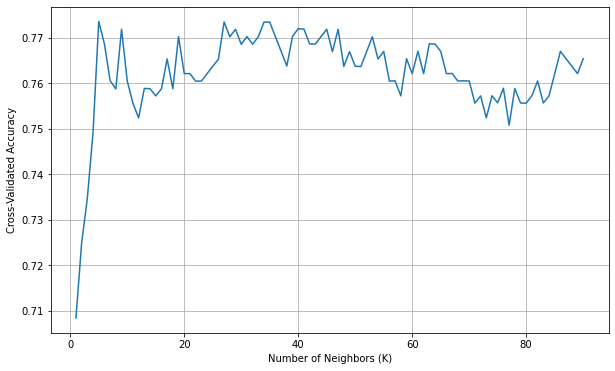

In [35]:
# Plot results.
plt.figure(figsize=[10, 6])
plt.plot(num_neighbors, cv_scores)
plt.grid()
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")

In [27]:
print(
    "Best accuracy is {} with number of neighbours = {}".format(
        max(cv_scores), cv_scores.index(max(cv_scores)) + 1
    )
)

Best accuracy is 0.7736118455843469 with number of neighbours = 5


### Train and Test KNN 

In [31]:
# Define KNN classifier.
knn = KNeighborsClassifier(n_neighbors=5)

In [32]:
# Fit the model on training data.
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [33]:
# Predict the unlabeled data.
Y_pred = knn.predict(X_test)

In [34]:
print("The accuracy score is: {}".format(accuracy_score(Y_test, Y_pred)))

The accuracy score is: 0.7467532467532467


## Literature

* https://learn.sherlockml.com/tutorials/knn


* https://docs.sherlockml.com/libraries/lens/getting_started.html


* https://www.youtube.com/watch?v=k_7gMp5wh5A&list=PLBv09BD7ez_68OwSB97WXyIOvvI5nqi-3


* https://scikit-learn.org/